In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Primeiro caso, utilizando as informações default do orbeini.dat 
##### (Sistema composto de Mercúrio até Netuno com o Sol a 1M)

 - Lendo o arquivo de saída do orbe

In [2]:
orb_out1 = np.loadtxt('orbelinux/linux/orbeout.dat')

In [3]:
orb_1 = pd.DataFrame(data = orb_out1,columns = ['Tempo (Myr)', 'Planeta','a','e','i','node','w','M'])

In [4]:
orb_1

,Tempo (Myr),Planeta,a,e,i,node,w,M
0,0.0,1.0,0.387098,0.205640,7.00,48.32,29.14,143.52
1,0.0,2.0,0.723329,0.006759,3.39,76.66,54.53,24.82
2,0.0,3.0,0.999988,0.016717,0.00,0.00,103.03,257.61
3,0.0,4.0,1.523674,0.093437,1.85,49.54,286.56,226.11
4,0.0,5.0,5.202040,0.048933,1.30,100.51,274.18,223.70
...,...,...,...,...,...,...,...,...
8003,-1000000.0,4.0,1.523619,0.039485,5.68,189.89,227.48,88.46
8004,-1000000.0,5.0,5.202394,0.048258,1.79,103.03,206.18,289.71
8005,-1000000.0,6.0,9.545279,0.057248,1.09,146.50,87.58,100.70
8006,-1000000.0,7.0,19.162712,0.031816,2.54,91.83,323.55,328.22


 - Ordenando as informações de cada planeta para facilitar a retirada dos dados

In [5]:
orb_1 = orb_1.sort_values(by='Planeta')

Por exemplo, estamos interessados nas informações da Terra (planeta 3). Portanto, vamos descobrir os index onde estão suas informações:

In [6]:
Planetas = orb_1['Planeta']

 - Uma maracutaia para descobrir quais os index do planeta que nos interessa. Nesse caso, descobrimos que as informações da Terra estão entre 2003 -> 3003

In [7]:
ind = 0
index = []
for i in Planetas.values:   # laço para saber quais index estão os planetas de interesse
    ind = ind + 1
    if i == 3:
        index.append(ind)
#index[0] e index[-1]--> #2003 --> 3003 

In [8]:
Terra =  orb_1[2002:3003]
Terra

,Tempo (Myr),Planeta,a,e,i,node,w,M
258,-32000.0,3.0,1.000010,0.015801,3.76,75.01,311.80,173.69
4778,-597000.0,3.0,1.000012,0.049439,2.23,117.90,286.62,84.37
4714,-589000.0,3.0,1.000006,0.047710,1.97,100.87,323.62,14.49
7666,-958000.0,3.0,0.999992,0.045521,1.21,129.05,255.77,187.92
2530,-316000.0,3.0,1.000005,0.037116,3.59,104.60,231.10,200.64
...,...,...,...,...,...,...,...,...
1922,-240000.0,3.0,0.999982,0.040624,3.75,62.78,9.68,348.89
1930,-241000.0,3.0,1.000012,0.039902,3.80,65.57,4.74,357.28
5578,-697000.0,3.0,1.000000,0.043894,0.92,103.03,148.16,139.56
5594,-699000.0,3.0,0.999985,0.043800,0.88,93.50,152.57,157.12


### Plotando as info que nos interessa. Vamos imitar o gráfico no site de Orbe e comparar a excentricidade da Terra e Marte.

 - Fazendo mesma maracutaia, descobrimos que as info de Marte estão entre as linhas 3004 --> 4004

In [9]:
Marte = orb_1[3003:4004]
Marte

,Tempo (Myr),Planeta,a,e,i,node,w,M
3939,-492000.0,4.0,1.523620,0.059708,5.90,146.16,243.96,116.14
7531,-941000.0,4.0,1.523635,0.089545,4.17,253.30,102.99,92.61
4843,-605000.0,4.0,1.523607,0.056778,4.64,29.76,141.92,228.94
3835,-479000.0,4.0,1.523685,0.076311,6.08,95.76,0.99,329.48
3891,-486000.0,4.0,1.523747,0.066763,6.19,122.15,299.69,102.88
...,...,...,...,...,...,...,...,...
931,-116000.0,4.0,1.523639,0.062614,1.61,146.74,321.99,341.96
2259,-282000.0,4.0,1.523777,0.100207,2.69,130.09,235.56,60.48
1739,-217000.0,4.0,1.523627,0.063668,0.88,161.64,150.51,72.53
283,-35000.0,4.0,1.523651,0.080088,2.77,115.89,31.14,189.12


In [10]:
Terra_t = Terra['Tempo (Myr)']
Marte_t = Marte['Tempo (Myr)']
Terra_e = Terra['e']
Marte_e = Marte['e']

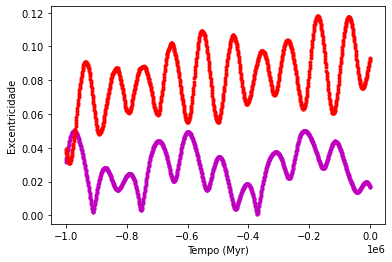

In [11]:
plt.plot(Terra_t, Terra_e,'m.')
plt.plot(Marte_t, Marte_e,'r.')
plt.xlabel('Tempo (Myr)')
plt.ylabel('Excentricidade')
plt.show()

- Plotando a(t),e(t), i(t) de todos os planetas

In [12]:
Mercurio = orb_1[0:1001]

In [13]:
Venus = orb_1[1002:2002]

In [14]:
Jupiter = orb_1[4004:5005]

In [15]:
Saturno = orb_1[5005:6006]

In [16]:
Urano = orb_1[6006:7007]

In [17]:
Netuno = orb_1[7007:]

In [18]:
Mercurio_t = Mercurio['Tempo (Myr)']
Mercurio_a = Mercurio['a']
Mercurio_e = Mercurio['e']
Mercurio_i = Mercurio['i']

Venus_t = Venus['Tempo (Myr)']
Venus_a = Venus['a']
Venus_e = Venus['e']
Venus_i = Venus['i']

Terra_a = Terra['a']
Terra_i = Terra['i']

Marte_a = Marte['a']
Marte_i = Marte['i']

Jupiter_t = Jupiter['Tempo (Myr)']
Jupiter_a = Jupiter['a']
Jupiter_e = Jupiter['e']
Jupiter_i = Jupiter['i']

Saturno_t = Saturno['Tempo (Myr)']
Saturno_a = Saturno['a']
Saturno_e = Saturno['e']
Saturno_i = Saturno['i']

Urano_t = Urano['Tempo (Myr)']
Urano_a = Urano['a']
Urano_e = Urano['e']
Urano_i = Urano['i']

Netuno_t = Netuno['Tempo (Myr)']
Netuno_a = Netuno['a']
Netuno_e = Netuno['e']
Netuno_i = Netuno['i']

- Plot de i(t) de Mercurio, Venus, Terra, Marte, Jupiter, Saturno, Urano e Netuno

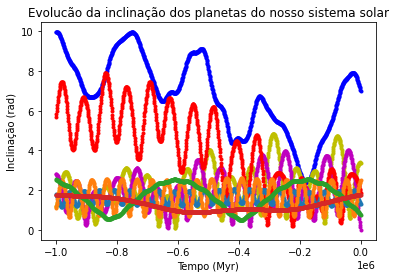

In [132]:
plt.plot(Mercurio_t, Mercurio_i,'b.')
plt.xlabel('Tempo (Myr)')
plt.ylabel('Inclinação (rad)')
plt.plot(Venus_t, Venus_i,'y.')
plt.plot(Terra_t, Terra_i,'m.')
plt.plot(Marte_t, Marte_i,'r.')
plt.plot(Jupiter_t, Jupiter_i,'.')
plt.plot(Saturno_t, Saturno_i,'.')
plt.plot(Urano_t, Urano_i,'.')
plt.plot(Netuno_t, Netuno_i,'.')

plt.title('Evolucão da inclinação dos planetas do nosso sistema solar')
plt.show()

 - OBS: De 0° a 180°, sendo zero graus (0 rad) se coincide com a eclíptica, noventa graus (1,57 rad) se for perpedicular e cento e oitenta graus (3,14 rad) sendo movimento retrógrado. Ou seja, uma inclinação de exatamente 90 graus indicaria uma órbita perpendicular que não é nem prógrada nem retrógrada. Uma inclinação entre 90 e 180 graus indica uma órbita retrógrada. Para além disso, o movimento é prógrado.

Text(0.5, 1.0, 'Evolucao da inclinacão de Urano')

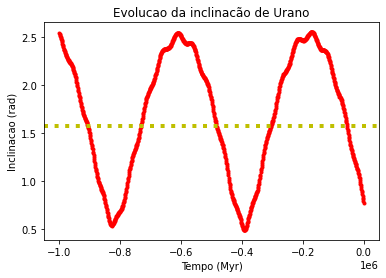

In [20]:
plt.plot(Urano_t,Urano_i,'r.')
plt.axhline(1.57, color='y', linestyle='dotted', linewidth=4)
plt.xlabel('Tempo (Myr)')
plt.ylabel('Inclinacao (rad)')
plt.title('Evolucao da inclinacão de Urano')

Text(0.5, 1.0, 'Evolução da inclinação da Terra')

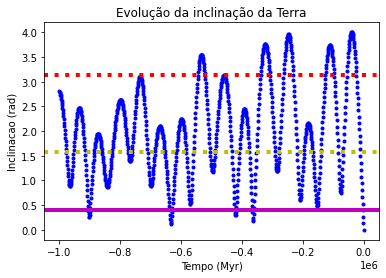

In [21]:
plt.plot(Terra_t,Terra_i,'b.')
plt.xlabel('Tempo (Myr)')
plt.axhline(3.14, color='r', linestyle='dotted', linewidth=4)
plt.axhline(1.57, color='y', linestyle='dotted', linewidth=4)
plt.axhline(0.4, color='m', linewidth=4)
plt.ylabel('Inclinacao (rad)')
plt.title('Evolução da inclinação da Terra')

 - Evolução da inclinação da Terra ao longo dos milhares de anos. Entre a linha vermelha e a amarela, o movimento se torna retrógrado. Aproximando-se cada vez mais da linha amarela o movimento é perpendicular a eclíptica. (linha rosa indica os pontos em que a Terra possui a inclinação atual)

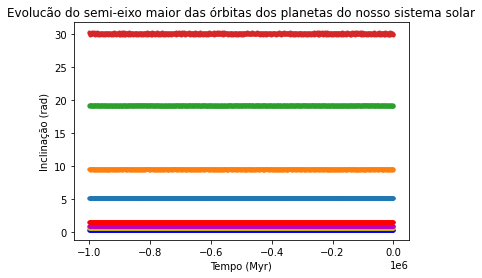

In [22]:
plt.plot(Mercurio_t, Mercurio_a,'b.')
plt.xlabel('Tempo (Myr)')
plt.ylabel('Inclinação (rad)')
plt.plot(Venus_t, Venus_a,'y.')
plt.plot(Terra_t, Terra_a,'m.')
plt.plot(Marte_t, Marte_a,'r.')
plt.plot(Jupiter_t, Jupiter_a,'.')
plt.plot(Saturno_t, Saturno_a,'.')
plt.plot(Urano_t, Urano_a,'.')
plt.plot(Netuno_t, Netuno_a,'.')

plt.title('Evolucão do semi-eixo maior das órbitas dos planetas do nosso sistema solar')
plt.show()

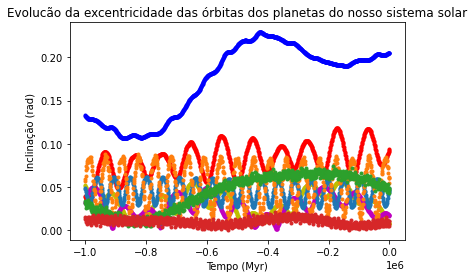

In [23]:
plt.plot(Mercurio_t, Mercurio_e,'b.')
plt.xlabel('Tempo (Myr)')
plt.ylabel('Inclinação (rad)')
plt.plot(Venus_t, Venus_e,'y.')
plt.plot(Terra_t, Terra_e,'m.')
plt.plot(Marte_t, Marte_e,'r.')
plt.plot(Jupiter_t, Jupiter_e,'.')
plt.plot(Saturno_t, Saturno_e,'.')
plt.plot(Urano_t, Urano_e,'.')
plt.plot(Netuno_t, Netuno_e,'.')

plt.title('Evolucão da excentricidade das órbitas dos planetas do nosso sistema solar')
plt.show()

 - Um valor de 0 é uma órbita circular, valores entre 0 e 1 formam uma órbita elíptica, 1 é uma órbita de escape parabólica e maior que 1 é uma hipérbole. 

## Análise do Sistema Fictício chamado Kovil

 O sistema de Kovil é composto por cinco planetas, seus nomes: Vacter, Pamonha, Granulado, Marmelo e Camelo.
 
 - Vacter possui elementos orbitais parecidos com de Mercúrio, porém, sua massa é 10x maior que a de Júpiter! 
 - Pamonha possui elementos orbitais parecidos com da Terra, mas com a massa de Plutão.
 - Granulado possui elementos orbitais de Marte, mas com a massa de Saturno e Venus somados
 - Marmelo possui elementos obitais de Urano, mas a massa de Mercurio
 - Camelo possui elementos orbitais de Venus com a massa de Netuno
    
 - Seu 'Sol' possui 0,5 massa solar
 - O intervalo de tempo entre pontos foi diminuido em 20 anos

In [34]:
orb_out2 = np.loadtxt('orbelinux (1)/linux/orbeout.dat')

In [35]:
orb_2 = pd.DataFrame(data = orb_out2,columns = ['Tempo (Myr)', 'Planeta','a','e','i','node','w','M'])

In [36]:
orb_2

,Tempo (Myr),Planeta,a,e,i,node,w,M
0,0.0,1.0,0.387098,0.205640,5.50,48.32,29.00,143.52
1,0.0,2.0,0.999988,0.016717,0.00,0.00,103.03,257.61
2,0.0,3.0,1.523674,0.093437,1.85,49.54,286.56,226.11
3,0.0,4.0,19.176263,0.048094,0.77,73.96,98.52,169.39
4,0.0,5.0,0.723329,0.006759,3.39,76.66,54.53,24.82
...,...,...,...,...,...,...,...,...
5066,-998620.0,3.0,1.407144,0.243273,6.66,17.44,283.86,152.09
5067,-998620.0,4.0,26.341186,0.139617,2.27,355.46,174.38,0.84
5068,-999600.0,1.0,0.386676,0.204189,5.37,46.22,322.78,111.75
5069,-999600.0,3.0,1.489814,0.127976,4.10,90.76,159.23,316.69


In [55]:
orb_2 = orb_2.sort_values(by='Planeta')
orb_2

,Tempo (Myr),Planeta,a,e,i,node,w,M
0,0.0,1.0,0.387098,0.205640,5.50,48.32,29.00,143.52
4381,-775180.0,1.0,0.386679,0.205109,5.10,50.42,66.75,8.36
2041,-10780.0,1.0,0.386686,0.197016,5.23,45.44,319.90,31.37
2044,-11760.0,1.0,0.386684,0.201963,5.11,50.29,308.66,308.16
4387,-777140.0,1.0,0.386662,0.197905,5.01,46.75,57.29,205.36
...,...,...,...,...,...,...,...,...
2544,-174440.0,4.0,21.912503,0.190445,0.61,36.00,42.12,91.24
2394,-125440.0,4.0,17.124246,0.167385,0.74,37.82,116.33,222.31
5070,-999600.0,4.0,28.046857,0.284662,1.90,2.33,89.65,2.97
2008,0.0,5.0,0.723329,0.006759,3.39,76.66,54.53,24.82


In [ ]:
Planetas = orb_2['Planeta']
ind = 0
index = []
for i in Planetas.values:   # laço para saber quais index estão os planetas de interesse
    ind = ind + 1
    if i == 4:
        index.append(ind)
#index[0] e index[-1]--> #2003 --> 3003 
index[-1]

In [80]:
#Mesma maracutaia de antes
#O que interessa é:
Vacter = orb_2[:1688]
Pamonha = orb_2[1688:1693]
Granulado = orb_2[1693:3381]
Marmelo = orb_2[3381:5069]
Camelo = orb_2[5069:]

In [81]:
Vacter_a = Vacter['a']
Vacter_t = Vacter['Tempo (Myr)']
Vacter_e = Vacter['e']
Vacter_i = Vacter['i']
Vacter_n = Vacter['node']
Vacter_w = Vacter['w']
Vacter_m = Vacter['M']

Pamonha_t = Pamonha['Tempo (Myr)']
Pamonha_a = Pamonha['a']
Pamonha_e = Pamonha['e']
Pamonha_i = Pamonha['i']
Pamonha_n = Pamonha['node']
Pamonha_w = Pamonha['w']
Pamonha_m = Pamonha['M']

Granulado_t = Granulado['Tempo (Myr)']
Granulado_a = Granulado['a']
Granulado_e = Granulado['e']
Granulado_i = Granulado['i']
Granulado_n = Granulado['node']
Granulado_w = Granulado['w']
Granulado_m = Granulado['M']

Marmelo_t = Marmelo['Tempo (Myr)']
Marmelo_a = Marmelo['a']
Marmelo_e = Marmelo['e']
Marmelo_i = Marmelo['i']
Marmelo_n = Marmelo['node']
Marmelo_w = Marmelo['w']
Marmelo_m = Marmelo['M']

Camelo_t = Camelo['Tempo (Myr)']
Camelo_a = Camelo['a']
Camelo_e = Camelo['e']
Camelo_i = Camelo['i']
Camelo_n = Camelo['node']
Camelo_w = Camelo['w']
Camelo_m = Camelo['M']

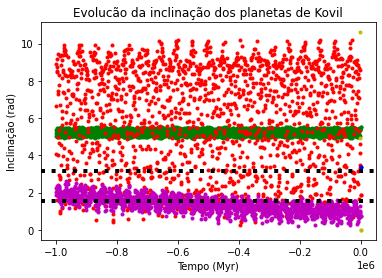

In [120]:
plt.plot(Vacter_t, Vacter_i,'g.')
plt.xlabel('Tempo (Myr)')
plt.ylabel('Inclinação (rad)')
plt.plot(Pamonha_t, Pamonha_i,'y.')
plt.plot(Granulado_t, Granulado_i,'r.')
plt.plot(Marmelo_t, Marmelo_i,'m.')
plt.plot(Camelo_t, Camelo_i,'b.')
plt.axhline(3.14, color='black', linestyle='dotted', linewidth=4) #Acima de 3.14 o movimento deixa de ser retrógrado
plt.axhline(1.57, color='black', linestyle='dotted', linewidth=4) #Apartir de 1.57 o planeta esta perpendicular c a ecliptica


plt.title('Evolucão da inclinação dos planetas de Kovil')
plt.show()

 - Marmelo (em rosa) tem inclinação bem variada ao longo dos anos, ora perpendicular à eclíptica, ora paralelo, estando em movimento retrógrado por quase metade do tempo. Vacter (em verde) está sempre com inclinação média por volta dos 5.3 radianos (303°), o que torna o movimento prógrado e, praticamente, com inclinação de 56,3° com a eclíptica.

Text(0.5, 1.0, 'Evolução da inclinação de Vacter')

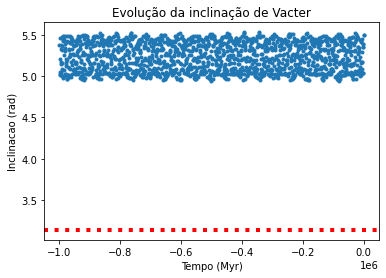

In [82]:
plt.plot(Vacter_t,Vacter_i,'.')
plt.xlabel('Tempo (Myr)')
plt.axhline(3.14, color='r', linestyle='dotted', linewidth=4) #Acima dessa linha o movimento é retrógrado
plt.ylabel('Inclinacao (rad)')
plt.title('Evolução da inclinação de Vacter')

Text(0.5, 1.0, 'Evolução da inclinação de Granulado')

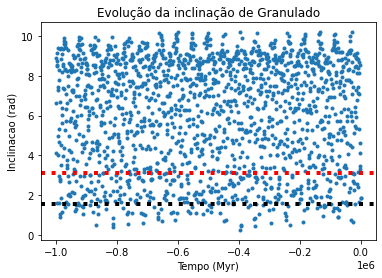

In [107]:
plt.plot(Granulado_t,Granulado_i,'.')
plt.xlabel('Tempo (Myr)')
plt.axhline(3.14, color='r', linestyle='dotted', linewidth=4) #Acima dessa linha o movimento é retrógrado
plt.axhline(1.57, color='black', linestyle='dotted', linewidth=4)
plt.ylabel('Inclinacao (rad)')
plt.title('Evolução da inclinação de Granulado')

 - Granulado, planeta bem massudo e quase tão próximo da estrela central quanto Marte, possui inclinação super variada, com movimento majoritariamente prógrado, mas com parte dos pontos no limiar retrógrado. Ao que parece, se trata de um corpo super instável.

Text(0.5, 1.0, 'Comparação do semi-eixo maior de Vacter e Granulado ao longo dos anos')

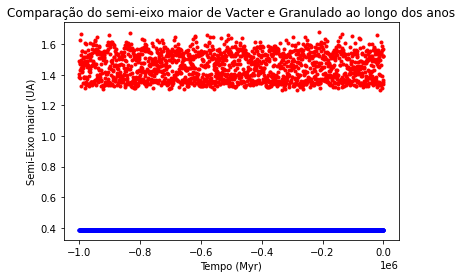

In [83]:
plt.plot(Granulado_t,Granulado_a,'r.')
plt.plot(Vacter_t,Vacter_a,'b.')
plt.xlabel('Tempo (Myr)')
plt.ylabel('Semi-Eixo maior (UA)')
plt.title('Comparação do semi-eixo maior de Vacter e Granulado ao longo dos anos')
#Vacter em azul, Granulado em vermelho

- Vacter, o mais próximo de sua estrela central (apenas 40% da distância da Terra ao Sol), quase não sofre alteração em seu semi-eixo maior, enquanto Granulado, razoavelmente afastado e bastante massudo, possui significativas alterações por volta dos 1.5 UA

Text(0.5, 1.0, 'Evolução do semi-eixo maior da Pamonha')

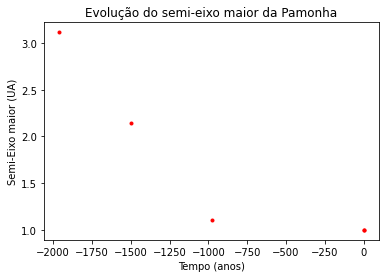

In [119]:
plt.plot(Pamonha_t,Pamonha_a,'r.')

plt.xlabel('Tempo (anos)')
plt.ylabel('Semi-Eixo maior (UA)')
plt.title('Evolução do semi-eixo maior da Pamonha')

 - Pamonha, sendo um corpo relativamente próximo da estrela central do sistema (incialmente cerca de 3x a distância da Terra ao Sol) e com pouquíssima massa (mais comumente encontrada entre corpos do sitema solar exterior), acaba variando muito de semi-eixo maior e em cerca de apenas 2.000 anos ele desaparece do sistema. Provavelmente Myr foi pouco para acompanhar a evolução deste planeta.

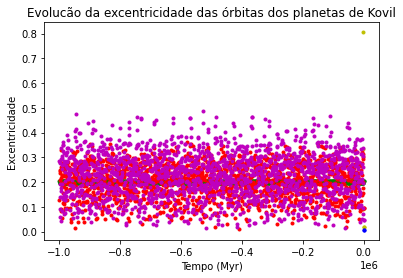

In [135]:
plt.plot(Vacter_t, Vacter_e,'g.')
plt.xlabel('Tempo (Myr)')
plt.ylabel('Excentricidade')
plt.plot(Pamonha_t, Pamonha_e,'y.')
plt.plot(Granulado_t, Granulado_e,'r.')
plt.plot(Marmelo_t, Marmelo_e,'m.')
plt.plot(Camelo_t, Camelo_e,'b.')


plt.title('Evolucão da excentricidade das órbitas dos planetas de Kovil')
plt.show()

Text(0.5, 1.0, 'Comparação da excentricidade de Vacter e Granulado ao longo dos anos')

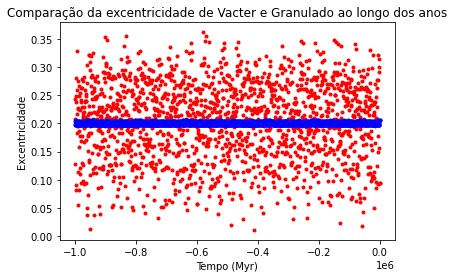

In [93]:
plt.plot(Granulado_t,Granulado_e,'r.')
plt.plot(Vacter_t,Vacter_e,'b.')
plt.xlabel('Tempo (Myr)')
plt.ylabel('Excentricidade')
plt.title('Comparação da excentricidade de Vacter e Granulado ao longo dos anos')

- Vacter possui uma excentricidade quase constante ao longo do tempo, por volta dos 0.2, caracterizando-a como uma orbita elíptica de baixa excentricidade. Granulado possui pontos esporádicos, mas ainda numa variação que a torna uma orbita elíptica pouco achatada.

Text(0.5, 1.0, 'Comparação da excentricidade de Marmelo e Granulado ao longo dos anos')

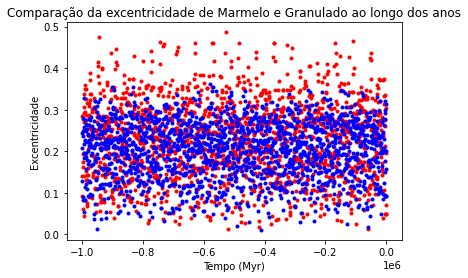

In [98]:
plt.plot(Marmelo_t,Marmelo_e,'r.')
plt.plot(Granulado_t,Granulado_e,'b.')
plt.xlabel('Tempo (Myr)')
plt.ylabel('Excentricidade')
plt.title('Comparação da excentricidade de Marmelo e Granulado ao longo dos anos')

- Marmelo e Granulado possuem alta variação de suas excentricidades, sendo Marmelo aquele que alcança o maior pico de 0.5. No geral, ambas possuem uma órbita quase circular, num formato elíptico com baixa excentricidade.

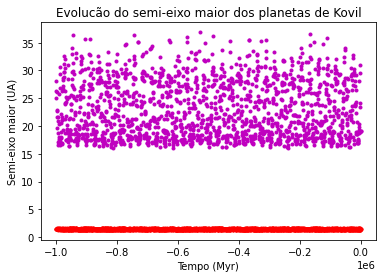

In [137]:
#plt.plot(Vacter_t, Vacter_a,'g.')
plt.xlabel('Tempo (Myr)')
plt.ylabel('Semi-eixo maior (UA)')
#plt.plot(Pamonha_t, Pamonha_a,'y.')
plt.plot(Granulado_t, Granulado_a,'r.')
plt.plot(Marmelo_t, Marmelo_a,'m.')
#plt.plot(Camelo_t, Camelo_a,'b.')


plt.title('Evolucão do semi-eixo maior dos planetas de Kovil')
plt.show()

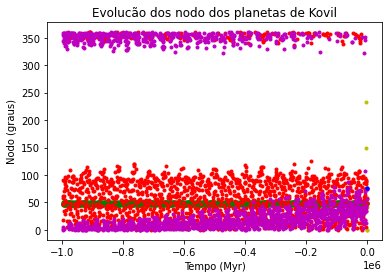

In [122]:
plt.plot(Vacter_t, Vacter_n,'g.')
plt.xlabel('Tempo (Myr)')
plt.ylabel('Nodo (graus)')
plt.plot(Pamonha_t, Pamonha_n,'y.')
plt.plot(Granulado_t, Granulado_n,'r.')
plt.plot(Marmelo_t, Marmelo_n,'m.')
plt.plot(Camelo_t, Camelo_n,'b.')


plt.title('Evolucão dos nodo dos planetas de Kovil')
plt.show()

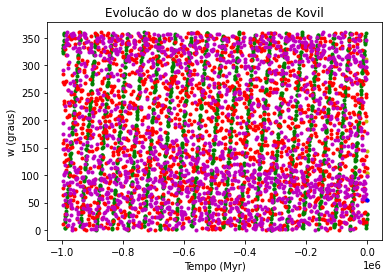

In [128]:
plt.plot(Vacter_t, Vacter_w,'g.')
plt.xlabel('Tempo (Myr)')
plt.ylabel('w (graus)')
plt.plot(Pamonha_t, Pamonha_w,'y.')
plt.plot(Granulado_t, Granulado_w,'r.')
plt.plot(Marmelo_t, Marmelo_w,'m.')
plt.plot(Camelo_t, Camelo_w,'b.')


plt.title('Evolucão do w dos planetas de Kovil')
plt.show()

### Informações finais:

 - Vacter permanece todo o tempo na distância média de 0.4 UA da estrela principal (que possui 0.5 massa do sol). Sua inclinação é sempre acima de 5.3 rad (303°), de forma que o movimento 'ultrapassa' o limiar do movimento retrógrado e passa a ser prógrado, como numa inclinação de por volta dos 56,3°, podendo variar até cerca de 74° (comparável com a Terra que possui atualmente 66,5°). Sua excentricidade é de cerca de 0.2, sem grandes variações, o que torna uma orbita levemente elíptica.
 - Pamonha tem vida útil curtíssima, provavelmente devido a sua pouca massa e grande proximidade com a estrela do sistema. Inicialmente está a cerca de 3 UA de distãncia, até que a distância cai para 1 AU em menos de 2000 anos, não havendo mais dados. Sua inclinação possui altas variações, começando com 5 rad (por volta dos 280°), indo para 1.5 rad (86°) e subindo até acima de 10 rad (572° --> 216° --> 114°), o que a faz passar pelo limiar do mvoimento retrógrado algumas vezes. Sua excentricidade começa alta (por volta dos 0.8), mas não sendo suficiente pra uma órbita parabólica, caindo até a excentricidade 0 indicando uma órbita circular no final (ou fim do movimento).
 - Granulado possui semi-eixo maior médio de 1.5 UA, podendo variar de 1.3 até 1.65 UA. Sua excentricidade média fica por volta dos 0.2, tendo seu máximo em 0.35 e mínimo em 0, possuindo órbita levemente elíptica e até circular em cercos pontos. Possui inclinação super variada, com movimento majoritariamente prógrado, mas com parte dos pontos no limiar retrógrado. Ao que parece, se trata de um corpo super instável.
 - Marmelo, pouco massudo, começa numa distância de 25 UA e possui altas variações ao longo do tempo, indo do mínimo de 15 UA até 35 UA.  Sua excentricidade varia ao redor do 0.25, não ultrapassando o teto de 0.5, e tocando em e=0 raríssimas vezes, o que caracteriza uma órbita levemente elíptica. Sua inclinação possui uma queda quase linear ao longo do tempo, começando com uma média de 2 rad (114°) e indo até 1 rad, com movimento incialmente retrógrado e progressivamente se estabilizando num movimento prógrado de inclinação média de 57°
 - Camelo possui vida ainda mais curta que Pamonha, possuindo apenas dois pontos de dados. Seu semi-eixo maior chega ao valor de 0.7 UA. Sua excentricidade é bem próxima de 0, o que torna a orbita circular. Sua inclinação é de aproximadamente 3.3 rad (190° --> -10°), tendo um movimento prógrado. 